In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [47]:
n = 10000

random_numbers = np.random.uniform(0, 1, n).astype(np.float32)
reference_sum = np.sum(random_numbers)


def sum_with_double_precision(numbers):
    sum_double = np.float64(0.0)
    for num in numbers:
        sum_double += num
    return sum_double


result_a = sum_with_double_precision(random_numbers)

(a) Suma z akumulatorem podwójnej precyzji: 4991.090069592188
(b) Suma z akumulatorem pojedynczej precyzji: 4991.08984375
(c) Suma z algorytmem Kahana: 4991.08984375
(d) Suma w porządku rosnącym: 4991.099609375
(e) Suma w porządku malejącym: 4991.1103515625
Prawdziwa suma (np.fsum): 4991.09033203125

Błędy względne:
(a) Błąd względny dla akumulatora podwójnej precyzji: 5.26e-08
(b) Błąd względny dla akumulatora pojedynczej precyzji: 9.78e-08
(c) Błąd względny dla algorytmu Kahana: 9.78e-08
(d) Błąd względny dla sumy w porządku rosnącym: 1.86e-06
(e) Błąd względny dla sumy w porządku malejącym: 4.01e-06
Obliczenia dla n=10000 zakończone
Obliczenia dla n=100000 zakończone
Obliczenia dla n=1000000 zakończone
Obliczenia dla n=10000000 zakończone


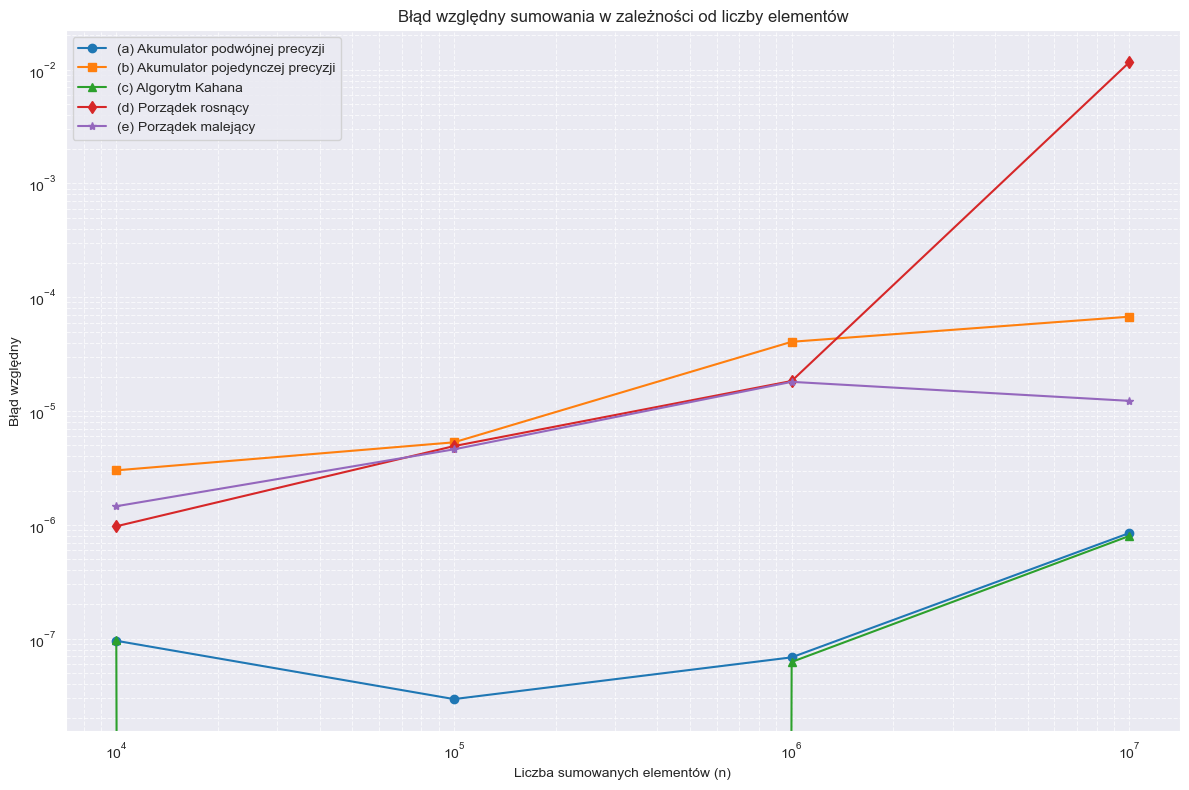

In [48]:
# (b) Sumowanie z akumulatorem pojedynczej precyzji
def sum_with_single_precision(numbers):
    sum_single = np.float32(0.0)  # Akumulator pojedynczej precyzji
    for num in numbers:
        sum_single += num
    return sum_single


# (c) Algorytm Kahana sumowania z kompensacją
def kahan_sum(numbers):
    sum_k = np.float32(0.0)  # Akumulator pojedynczej precyzji
    err = np.float32(0.0)  # Błąd kompensacji
    for num in numbers:
        y = np.float32(num - err)  # Korekta wartości dodawanej
        temp = np.float32(sum_k + y)
        err = np.float32((temp - sum_k) - y)  # Obliczenie nowego błędu
        sum_k = temp
    return sum_k


# (d) Sumowanie w porządku rosnącym
def sum_ascending(numbers):
    sorted_numbers = np.sort(numbers)  # Sortowanie rosnąco
    sum_asc = np.float32(0.0)
    for num in sorted_numbers:
        sum_asc += num
    return sum_asc


# (e) Sumowanie w porządku malejącym
def sum_descending(numbers):
    sorted_numbers = np.sort(numbers)[::-1]  # Sortowanie malejąco
    sum_desc = np.float32(0.0)
    for num in sorted_numbers:
        sum_desc += num
    return sum_desc


# Obliczanie wszystkich sum dla aktualnej wartości n
result_b = sum_with_single_precision(random_numbers)
result_c = kahan_sum(random_numbers)
result_d = sum_ascending(random_numbers)
result_e = sum_descending(random_numbers)

# Przyjmujemy np.fsum jako wartość referencyjną (prawdziwą)
true_sum = np.sum(random_numbers)

print(f"(a) Suma z akumulatorem podwójnej precyzji: {result_a}")
print(f"(b) Suma z akumulatorem pojedynczej precyzji: {result_b}")
print(f"(c) Suma z algorytmem Kahana: {result_c}")
print(f"(d) Suma w porządku rosnącym: {result_d}")
print(f"(e) Suma w porządku malejącym: {result_e}")
print(f"Prawdziwa suma (np.fsum): {true_sum}")

# Obliczanie błędów względnych
rel_error_a = abs((result_a - true_sum) / true_sum)
rel_error_b = abs((result_b - true_sum) / true_sum)
rel_error_c = abs((result_c - true_sum) / true_sum)
rel_error_d = abs((result_d - true_sum) / true_sum)
rel_error_e = abs((result_e - true_sum) / true_sum)

print("\nBłędy względne:")
print(f"(a) Błąd względny dla akumulatora podwójnej precyzji: {rel_error_a:.2e}")
print(f"(b) Błąd względny dla akumulatora pojedynczej precyzji: {rel_error_b:.2e}")
print(f"(c) Błąd względny dla algorytmu Kahana: {rel_error_c:.2e}")
print(f"(d) Błąd względny dla sumy w porządku rosnącym: {rel_error_d:.2e}")
print(f"(e) Błąd względny dla sumy w porządku malejącym: {rel_error_e:.2e}")

# Wykres błędów względnych w zależności od n
n_values = [10**k for k in range(4, 8)]  # 10^4 do 10^8
errors_a = []
errors_b = []
errors_c = []
errors_d = []
errors_e = []

for n_val in n_values:
    # Generujemy nowy zestaw liczb o odpowiednim rozmiarze
    nums = np.random.uniform(0, 1, n_val).astype(np.float32)

    # Obliczamy prawdziwą sumę
    true_sum = np.sum(nums)

    # Obliczamy sumy różnymi metodami
    sum_a = sum_with_double_precision(nums)
    sum_b = sum_with_single_precision(nums)
    sum_c = kahan_sum(nums)
    sum_d = sum_ascending(nums)
    sum_e = sum_descending(nums)

    # Obliczamy błędy względne
    errors_a.append(abs((sum_a - true_sum) / true_sum))
    errors_b.append(abs((sum_b - true_sum) / true_sum))
    errors_c.append(abs((sum_c - true_sum) / true_sum))
    errors_d.append(abs((sum_d - true_sum) / true_sum))
    errors_e.append(abs((sum_e - true_sum) / true_sum))

    print(f"Obliczenia dla n={n_val} zakończone")

# Tworzenie wykresu błędów względnych
plt.figure(figsize=(12, 8))
plt.loglog(n_values, errors_a, "o-", label="(a) Akumulator podwójnej precyzji")
plt.loglog(n_values, errors_b, "s-", label="(b) Akumulator pojedynczej precyzji")
plt.loglog(n_values, errors_c, "^-", label="(c) Algorytm Kahana")
plt.loglog(n_values, errors_d, "d-", label="(d) Porządek rosnący")
plt.loglog(n_values, errors_e, "*-", label="(e) Porządek malejący")

plt.xlabel("Liczba sumowanych elementów (n)")
plt.ylabel("Błąd względny")
plt.title("Błąd względny sumowania w zależności od liczby elementów")
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()